In [1]:
import numpy as np
# intialize global variables
chosenAttrValPairs = []
entropyY = 0

In [2]:
def partition(x):
    # Partition the column vector x into subsets indexed by its unique values

    d = dict()
    UniqueX = np.unique(x)
    for i in UniqueX:
      # print(i)
      arr = np.where(x==i)[0]
      d[i] = arr
    return d
    raise Exception('Function not yet implemented!')

In [3]:
def entropy(y):
    
    # Compute the entropy of a vector y by considering the counts of the unique values , in z

    z,z_count = np.unique(y,return_counts=True)
    total = np.size(y)
    h_entropy=0
    for i in range(0,len(z)):
      h_entropy+=(np.true_divide(z_count[i],total)) * np.log2(np.true_divide(z_count[i],total))
      # print(i,h_entropy)
 
    return -h_entropy
    raise Exception('Function not yet implemented!')

In [4]:
def mutual_information(x, y, xIndex):
    # Returns the mutual information: I(x, y) = H(y) - H(y | x)
    
    mi_dict_vx=dict()
    x_unique,x_counts = np.unique(x,return_counts=True)
    # loop through unique vals of the given column
    for v in x_unique:
      if [xIndex,v] not in chosenAttrValPairs:   # attribute-value pair not selected in previous splits
          y_v = y[np.where(x==v)]
          y_notv= y[np.where(x!=v)]
          mi_dict_vx[v] = entropyY -(np.true_divide(len(y_v),len(y))*entropy(y_v) + np.true_divide(len(y_notv),len(y))*entropy(y_notv))
      else:
          mi_dict_vx[v] = float('-inf')  
    return mi_dict_vx
    
    raise Exception('Function not yet implemented!')

In [5]:
def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=3):
    """
    Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
    attribute-value pairs to consider. 
    """
 
     
    if depth == 0:
      attribute_value_pairs =[]
      for i in range(len(x[1,:])):
        x_unique = np.unique(x[:,i])
        for j in x_unique:
          attribute_value_pairs.append((i,j))
 
    #print(attribute_value_pairs)
    #print(chosenAttrValPairs)
 
    DT= dict()
 
    if len(np.unique(y))==1 :          # pure label
      # print("case 1: pure label\nreturning y=",np.unique(y)[0])    
      return np.unique(y)[0]
 
    if len(attribute_value_pairs) == 0:  # attribute-value pairs exhausted
      # print("case 2: attribute-value pairs exhausted\nreturning y=",np.bincount(y).argmax())
      return np.bincount(y).argmax()
      
    if depth >= max_depth:             # max allowed depth reached
      # print("case 3: max-depth ",max_depth," reached\nreturning y=",np.bincount(y).argmax())
      return np.bincount(y).argmax()
 
    #call partitions on all the attributes of x - loop on x cols - Get featurewise value indices and add the op dicts into a partitionlist
    partitionList=[]
    mi_dict_x = []
    for i in range(len(x[1,:])): #len(x[1,:]) = 6
    #for i in (attribute_value_pairs):
      partitionList.append(partition(x[:,i]))
      # calculate Mutual Information
      #print("MI for col ",i,mutual_information(x[:,i],y,i))
      mi_dict_x.append(mutual_information(x[:,i],y,i))
 
    max_value = max([max(list(i.values())) for i in mi_dict_x ]) # extract the maximum information gain
    if(max_value == float('-inf')):                              # no more information gain obtained
        return np.bincount(y).argmax();                          # return majority label
 
    for i in mi_dict_x:
       v= list(i.values())
       k=list(i.keys())
       if(max_value in v):
         attriValue = k[v.index(max_value)] # pick the attribute corresponding to max_info_gain
         attriIndex = mi_dict_x.index(i)    # pick the attribute corresponding to max_info_gain
    """ # print attribute-value pair with maax info gain
    print("max_value: ",max_value)
    print("attriIndex :",attriIndex)
    print("attriValue: ",attriValue) """
    temp = partitionList[attriIndex]
    #print("Tree depth =>",depth)
    
    # prepare the X,Y tables to be passed on children nodes based on current split
    x1 = np.delete(x,np.where(x[:,attriIndex]==attriValue),axis=0)
    y1 = np.delete(y,np.where(x[:,attriIndex]==attriValue),axis=0)
    x2 = np.delete(x,np.where(x[:,attriIndex]!=attriValue),axis=0)
    y2 = np.delete(y,np.where(x[:,attriIndex]!=attriValue),axis=0)
   
    # remove attribute-value pair for the current split from the remaining pairs
    attribute_value_pairs.remove((attriIndex,attriValue))
 
    # add attribute-value pair for the current split to the already selected pairs
    chosenAttrValPairs.append([attriIndex,attriValue])
 
    # call id3 recursively on children nodes i.e. true-false branch
    if(x1.size != 0):
        DT[(attriIndex,attriValue,False)] = id3(x1,y1,attribute_value_pairs,depth=depth+1,max_depth=max_depth)
    if(x2.size != 0):   
        DT[(attriIndex,attriValue,True)] = id3(x2,y2,attribute_value_pairs,depth=depth+1,max_depth=max_depth)
 
    return DT
 
    # raise Exception('Function not yet implemented!')

In [6]:
def predict_example(x, tree):
    # Returns the predicted label of x according to tree
    #tree existence
    if (tree==0 or tree==1 or not tree):
        return tree
    node = list(tree.keys())[0]
    #print("node",node)
    
    if(x[node[0]]==node[1]):
        return predict_example(x, tree.get((node[0], node[1], True)))
    else:
        return predict_example(x, tree.get((node[0], node [1], False)))
    raise Exception('Function not yet implemented!')

In [7]:
def compute_error(y_true, y_pred):
    # Computes the average error between the true labels (y_true) and the predicted labels (y_pred)
  
    return (np.true_divide(1,len(y_true)) * sum(y_true != y_pred))
    raise Exception('Function not yet implemented!')

In [8]:
def visualize(tree, depth=0):
    # To visualize the tree in the console.


    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1}]'.format(split_criterion[0], split_criterion[1]))

        # Print the children
        if type(sub_trees) is dict:
            visualize(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))


if __name__ == '__main__':
    # Load the training data
    M = np.genfromtxt('./monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('./monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]

    # Learn a decision tree of depth 3
    decision_tree = id3(Xtrn, ytrn, max_depth=3)
    visualize(decision_tree)

    # Compute the test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    tst_err = compute_error(ytst, y_pred)

    print('Test Error = {0:4.2f}%.'.format(tst_err * 100))


TREE
+-- [SPLIT: x4 = 1]
|	+-- [SPLIT: x0 = 1]
|	|	+-- [SPLIT: x1 = 1]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x1 = 1]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x0 = 1]
|	|	+-- [SPLIT: x1 = 3]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x1 = 3]
|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x4 = 1]
|	+-- [LABEL = 1]
Test Error = 25.00%.


Test Error = 25.00%. depth  1
Test Error = 33.33%. depth  2
Test Error = 33.33%. depth  3
Test Error = 38.89%. depth  4
Test Error = 50.00%. depth  5
Test Error = 50.00%. depth  6
Test Error = 50.00%. depth  7
Test Error = 50.00%. depth  8
Test Error = 50.00%. depth  9
Test Error = 50.00%. depth  10


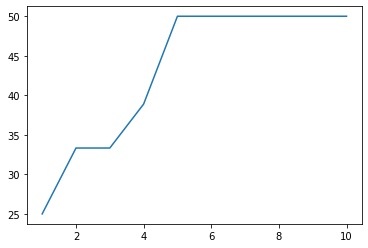

In [9]:
import matplotlib.pyplot as plt
 
test_errorArr=[]
depthArr=[]
chosenAttrValPairs = []
entropyY = 0
def get_errors_depths():  
  #returns error rate for differnt max_depths of tree : Proofs Occam's razor principle 
   M = np.genfromtxt('/content/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
   M = np.genfromtxt('/content/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
 
   for i in range(1,11):
    
    chosenAttrValPairs = []
    entropyY = 0
    # Load the training data
 
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]
 
    # Load the test data
    
    ytst = M[:, 0]
    Xtst = M[:, 1:]
 
    # Calculate initial entropy of labels Y
    entropyY = entropy(ytrn)
    #print("Entropy Y: ",entropyY)
 
    # Learn a decision tree of depth 3
    decision_tree = id3(Xtrn, ytrn,max_depth=i)
    # visualize(decision_tree)
    #print(decision_tree)
 
    # Compute the test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    tst_err = compute_error(ytst, y_pred)
    test_errorArr.append(tst_err * 100)
    depthArr.append(i)
    print('Test Error = {0:4.2f}%.'.format(tst_err * 100), "depth ",i)

get_errors_depths()
plt.plot(depthArr,test_errorArr)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import graphviz 

def tree_classifier(X_train,Y_train,X_test,Y_test,monks1_DS=True):
  # Uses sklearn DTClassifier to create the tree
  if(monks1_DS==True):
    M = np.genfromtxt('/content/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    M = np.genfromtxt('/content/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    # Load the training data
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]
    # Load the test data
    ytst = M[:, 0]
    Xtst = M[:, 1:]
  #getting really big tree if not altering default parameters of max_depth
  else:
    Xtrn=X_train
    ytrn=Y_train
    ytst=Y_test
    Xtst=X_test
  clf = DecisionTreeClassifier()
  clf = clf.fit(Xtrn,ytrn)
  y_pred = clf.predict(Xtst)
  print("Confusion Matrix with default sklearn DT classifier ")
  print(confusion_matrix(ytst, y_pred))
  plot_tree(clf) 
  dot_data = export_graphviz(clf, out_file=None) 
  g= graphviz.Source(dot_data)
  g.format= "png"
  g.view()
  print("tree_classifier ended.")

Confusion Matrix with default sklearn DT classifier 
[[216   0]
 [  0 216]]
tree_classifier ended.


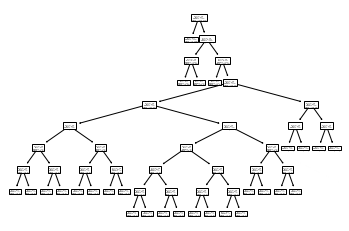

In [11]:
M = np.genfromtxt('/content/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
M = np.genfromtxt('/content/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    
# Load the training data
ytrn = M[:, 0]
Xtrn = M[:, 1:]
# Load the test data
ytst = M[:, 0]
Xtst = M[:, 1:]
tree_classifier(Xtrn,ytrn,Xtst,ytst,monks1_DS=True)

Confusion Matrix on new dataset name with id3:
[[1185    2]
 [ 117  727]]
Confusion Matrix with default sklearn DT classifier 
[[1187    0]
 [   0  844]]
tree_classifier ended.


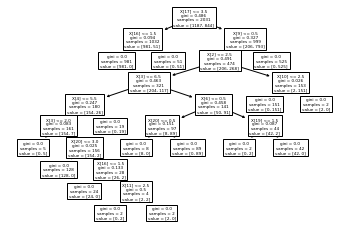

In [12]:
from sklearn.metrics import confusion_matrix
#Comparing results of our ID3 algo with sklearns
def get_new_dataset_matrix(dataset_name="/content/mushroom"): 
  M = np.genfromtxt(dataset_name+'.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
  M = np.genfromtxt(dataset_name+'.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
  # Load the training data
  ytrn = M[:, 0]
  Xtrn = M[:, 1:]
  # Load the test data
  ytst = M[:, 0]
  Xtst = M[:, 1:]
  # print(np.shape(ytrn))
  decision_tree = id3(Xtrn, ytrn,max_depth=3)
  #print(decision_tree)
  y_pred = [predict_example(x, decision_tree) for x in Xtst]
  print("Confusion Matrix on new dataset name with id3:")
  print(confusion_matrix(ytst, y_pred))
  tst_err = compute_error(ytst, y_pred)
  # print(tst_err * 100)
  # Load the training data
  ytrn = M[:, 0]
  Xtrn = M[:, 1:]
  # Load the test data
  ytst = M[:, 0]
  Xtst = M[:, 1:]
  tree_classifier(Xtrn,ytrn,Xtst,ytst,monks1_DS=False)

get_new_dataset_matrix()

In [17]:
def inbuilt_tree_classifier(monks1):
  # Trying on different Data set for comparision
    filename=""
    if(monks1== False):
        filename= "Mushroom"
        M = np.genfromtxt('./mushroom.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
        M = np.genfromtxt('./mushroom.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    else:
        filename= "Monks-1"
        M = np.genfromtxt('./monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
        M = np.genfromtxt('./monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    
    # Load the training data
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]
    # Load the test data
    ytst = M[:, 0]
    Xtst = M[:, 1:]
  #getting really big tree if not altering default parameters of max_depth
    clf = DecisionTreeClassifier()
    clf = clf.fit(Xtrn,ytrn)
    y_pred = clf.predict(Xtst)
    print("Confusion Matrix with default sklearn DT classifier on "+ filename+" dataset. ")
    print(confusion_matrix(ytst, y_pred))
    decision_tree = id3(Xtrn, ytrn,max_depth=3)
    #print(decision_tree)
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    print("Confusion Matrix on "+ filename+" with id3 with depth 3 :")
    print(confusion_matrix(ytst, y_pred))
    #plotting tree on graphviz
    plot_tree(clf)
    dot_data = export_graphviz(clf, out_file=None)
    g= graphviz.Source(dot_data)
    g.format = "png"
    g.render(filename)
    print("inbuilt_tree_classifier ended.")

Confusion Matrix with default sklearn DT classifier on Mushroom dataset. 
[[1187    0]
 [   0  844]]
Confusion Matrix on Mushroom with id3 with depth 3 :
[[1005  182]
 [  12  832]]
inbuilt_tree_classifier ended.


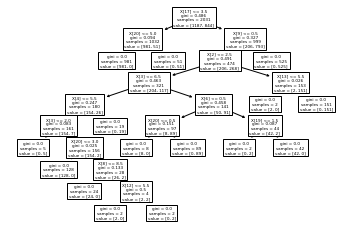

In [16]:
inbuilt_tree_classifier(False)